**Libraries Importation**

In [1]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from copy import deepcopy
import matplotlib
import matplotlib.colors as colors
import time

**Grid** **Color**

In [2]:
mapColor= ['black', 'green', 'red']

**Given Paramaters**

In [3]:
treeNotOnFire = 1
treeOnFire = 2
empty = 0

**Forest Cell Grid initialization**

In [4]:
def initForestGrid(n, probTree, probBurning):
    gridCell = np.zeros((n, n))
    startTime = time.time();
    for row in range(n):
        for column in range(n):
            if np.random.random() < probTree:
                if np.random.random() < probBurning:
                    gridCell[row][column] = treeOnFire
                else:
                    gridCell[row][column] = treeNotOnFire
    return gridCell,startTime

**Initialization of spread function**

In [5]:
@jit(nopython=True, parallel=True)
def apply_spread(grid, probImmune, probLightning):
    n = grid.shape[0]
    newGrid = np.zeros((n, n))
    # create extended grid with periodic boundary conditions
    extendedGrid = np.zeros((n+2, n+2))
    extendedGrid[1:-1, 1:-1] = grid
    extendedGrid[:,0] = extendedGrid[:,-2]
    extendedGrid[:,-1] = extendedGrid[:,1]
    extendedGrid[0,:] = extendedGrid[-2,:]
    extendedGrid[-1,:] = extendedGrid[1,:]
    # apply spread to internal cells of extended grid
    for row in range(1, n+1):
        for column in range(1, n+1):
            if extendedGrid[row][column] == 0:
                continue
            if extendedGrid[row][column] == 2:
                newGrid[row-1][column-1] = 0
            elif extendedGrid[row][column] == 1:
                newGrid[row-1][column-1] = 1
                # Von Neumann neighbour
                north = extendedGrid[row-1][column]
                south = extendedGrid[row+1][column]
                east =  extendedGrid[row][column-1]
                west = extendedGrid[row][column+1]
                
                neighbors = [north,south,east,west]
                if 2 in neighbors or (1 in neighbors and np.random.random() < probLightning):
                    if np.random.random() < probImmune:
                        newGrid[row-1][column-1] = treeNotOnFire
                    else:
                        newGrid[row-1][column-1] = treeOnFire
    return newGrid



**Algorithm Explanation** 

1. creation of fire spread value 

2. Asigning value 0 to burnt area and still maintaining the value of untouc6. Using the nomba annotation to normalise the sequential approach.hed tree to be 1.

3. Looping through row and column to implement moore eight direction movement.

4. Checking the whether lightning would cause a tree to to burn or not.

5. Lastly, assigning the value to be 1 when ligthning has no effect on it.



**Simulation Creation**

In [6]:
def simulateForestFire(n, probTree, probBurning, probImmune, probLightning, t):
    grid = initForestGrid(n, probTree, probBurning)[0]
    startTime = initForestGrid(n, probTree, probBurning)[1]
    grids = [grid]

    for i in range(t):
        grid = apply_spread(grid, probImmune, probLightning)
        grids.append(deepcopy(grid))
    endTime = time.time()
    computationTime = endTime - startTime
    print(f'Computation time obtained for grid {n} is  {computationTime}')
    return grids

**Visulaization of Fire**

In [7]:
def visualizeForestFire(grids):
    fig, ax = plt.subplots()
    colorMap = colors.ListedColormap(mapColor)
    bounds = [0, 1, 2, 3]
    norm = matplotlib.colors.BoundaryNorm(bounds, colorMap.N)
    mat = ax.matshow(grids[0], cmap=colorMap, norm=norm)

    def update(i):
        mat.set_data(grids[i])
        return [mat]

    ani = animation.FuncAnimation(fig, update, frames=len(grids), interval=1000, blit=True)
    ani.save('von_neumann_simulation_view.gif', writer='imagemagick')
    plt.axis('off')
    plt.show()


**Looping through various value of n**

In [8]:
nValues = [100,400,800,1000]

for n in nValues:
  simulateForestFire(n, 0.8, 0.01, 0.3, 0.001, 30)

Computation time obtained for grid 100 is  2.8695013523101807
Computation time obtained for grid 400 is  0.33501267433166504
Computation time obtained for grid 800 is  3.6338295936584473
Computation time obtained for grid 1000 is  2.8918418884277344


**Visualise a specific grid size**


Computation time obtained for grid 100 is  0.02341938018798828


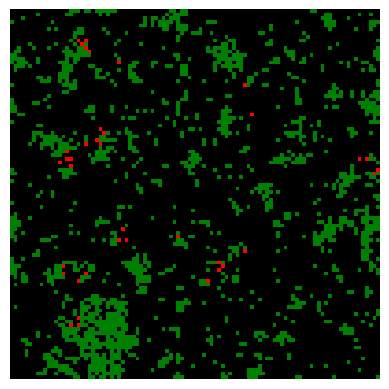

In [9]:
grids = simulateForestFire(100, 0.8, 0.01, 0.3, 0.001, 30)
visualizeForestFire(grids)

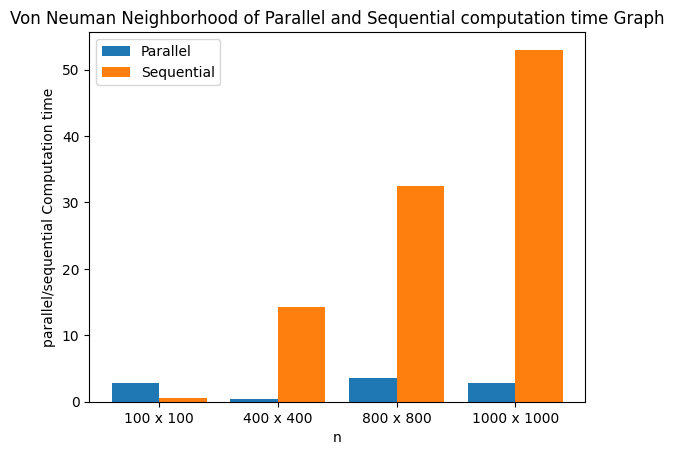

In [10]:
import numpy as np  
import matplotlib.pyplot as plt  

  

X = ['100 x 100','400 x 400','800 x 800','1000 x 1000'] 

parallel = [2.87,0.34,3.63,2.89] 

sequential  = [0.52,14.21,32.49,53.00] 

  

X_axis = np.arange(len(X)) 

  

plt.bar(X_axis - 0.2, parallel, 0.4, label = 'Parallel') 

plt.bar(X_axis + 0.2, sequential, 0.4, label = 'Sequential') 

  
plt.xticks(X_axis, X) 

plt.xlabel("n") 

plt.ylabel("parallel/sequential Computation time") 

plt.title("Von Neuman Neighborhood of Parallel and Sequential computation time Graph") 
plt.legend() 
plt.show() 